In [32]:
!pip install pandas numpy matplotlib seaborn scikit-learn   
!pip install statsmodels


  Using cached scikit_learn-1.7.2-cp314-cp314-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.16.3-cp314-cp314-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp314-cp314-win_amd64.whl (8.8 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached scipy-1.16.3-cp314-cp314-win_amd64.whl (39.4 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ---------------------------------------- 0/4 [threadpoolctl]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------

In [24]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [1]:
import pandas as pd

In [2]:
carbondata = pd.read_csv('carbonmonitor-us_datas_2025-11-22.csv')
carbondata.tail(5)

,state,date,sector,value,Unnamed: 4
341947,United States,27/12/2021,International Aviation,0.175717,NaN
341948,United States,28/12/2021,International Aviation,0.175380,NaN
341949,United States,29/12/2021,International Aviation,0.178956,NaN
341950,United States,30/12/2021,International Aviation,0.175332,NaN
341951,United States,31/12/2021,International Aviation,0.175538,NaN


In [3]:
#drop unnamed column
carbondata = carbondata.loc[:, ~carbondata.columns.str.contains('^Unnamed')]
carbondata.tail(5)

,state,date,sector,value
341947,United States,27/12/2021,International Aviation,0.175717
341948,United States,28/12/2021,International Aviation,0.175380
341949,United States,29/12/2021,International Aviation,0.178956
341950,United States,30/12/2021,International Aviation,0.175332
341951,United States,31/12/2021,International Aviation,0.175538


In [4]:
#rename column 'value' to 'emissions'
carbondata = carbondata.rename(columns={'value': 'emissions'})
carbondata.tail(5)

,state,date,sector,emissions
341947,United States,27/12/2021,International Aviation,0.175717
341948,United States,28/12/2021,International Aviation,0.175380
341949,United States,29/12/2021,International Aviation,0.178956
341950,United States,30/12/2021,International Aviation,0.175332
341951,United States,31/12/2021,International Aviation,0.175538


In [4]:
california_df = carbondata[carbondata['state'] == "California"]
california_df.head(5)

,state,date,sector,value
26304,California,01/01/2019,Power,0.074049
26305,California,02/01/2019,Power,0.084749
26306,California,03/01/2019,Power,0.086930
26307,California,04/01/2019,Power,0.084383
26308,California,05/01/2019,Power,0.088528


In [ ]:
california_df.to_csv("california_emissions.csv", index=False)


,state,date,sector,emissions
26304,California,01/01/2019,Power,0.074049
26305,California,02/01/2019,Power,0.084749
26306,California,03/01/2019,Power,0.086930
26307,California,04/01/2019,Power,0.084383
26308,California,05/01/2019,Power,0.088528


In [5]:
california_df.head(5)

,state,date,sector,value
26304,California,01/01/2019,Power,0.074049
26305,California,02/01/2019,Power,0.084749
26306,California,03/01/2019,Power,0.086930
26307,California,04/01/2019,Power,0.084383
26308,California,05/01/2019,Power,0.088528


In [7]:
#change column name value to emissions
california_df = california_df.rename(columns={'value': 'emissions'})
california_df.head(5)

,state,date,sector,emissions
26304,California,01/01/2019,Power,0.074049
26305,California,02/01/2019,Power,0.084749
26306,California,03/01/2019,Power,0.086930
26307,California,04/01/2019,Power,0.084383
26308,California,05/01/2019,Power,0.088528


In [8]:
california_df.info()
california_df.head()
california_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 6576 entries, 26304 to 32879
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      6576 non-null   object 
 1   date       6576 non-null   object 
 2   sector     6576 non-null   object 
 3   emissions  6576 non-null   float64
dtypes: float64(1), object(3)
memory usage: 256.9+ KB


,emissions
count,6576.000000
mean,0.150390
std,0.132277
min,0.011139
25%,0.055633
50%,0.096959
75%,0.180492
max,0.500525


In [ ]:
#convert date column to datetime format
california_df['date'] = pd.to_datetime(california_df['date'], dayfirst=True, errors='coerce')

In [10]:
california_df.head(5)

,state,date,sector,emissions
26304,California,2019-01-01,Power,0.074049
26305,California,2019-01-02,Power,0.084749
26306,California,2019-01-03,Power,0.086930
26307,California,2019-01-04,Power,0.084383
26308,California,2019-01-05,Power,0.088528


In [11]:
#checking for null values in date column after changing format
california_df['date'].isna().sum()

np.int64(0)

In [12]:
#check for missing values in california_df
california_df.isna().sum()

state        0
date         0
sector       0
emissions    0
dtype: int64

In [13]:
california_df = california_df.drop_duplicates()
#remove duplicate rows if any

In [14]:
california_df = california_df.sort_values('date')
#sort the dataframe by date in ascending order

In [15]:
california_df.head

<bound method NDFrame.head of             state       date                  sector  emissions
26304  California 2019-01-01                   Power   0.074049
30688  California 2019-01-01       Domestic Aviation   0.059544
31784  California 2019-01-01  International Aviation   0.046869
29592  California 2019-01-01             Residential   0.253830
28496  California 2019-01-01                Industry   0.177784
...           ...        ...                     ...        ...
30687  California 2021-12-31             Residential   0.181985
28495  California 2021-12-31        Ground Transport   0.361235
27399  California 2021-12-31                   Power   0.081479
31783  California 2021-12-31       Domestic Aviation   0.059120
32879  California 2021-12-31  International Aviation   0.030173

[6576 rows x 4 columns]>

In [16]:
california_df = california_df.reset_index(drop=True)


In [17]:
california_df.head

<bound method NDFrame.head of            state       date                  sector  emissions
0     California 2019-01-01                   Power   0.074049
1     California 2019-01-01       Domestic Aviation   0.059544
2     California 2019-01-01  International Aviation   0.046869
3     California 2019-01-01             Residential   0.253830
4     California 2019-01-01                Industry   0.177784
...          ...        ...                     ...        ...
6571  California 2021-12-31             Residential   0.181985
6572  California 2021-12-31        Ground Transport   0.361235
6573  California 2021-12-31                   Power   0.081479
6574  California 2021-12-31       Domestic Aviation   0.059120
6575  California 2021-12-31  International Aviation   0.030173

[6576 rows x 4 columns]>

In [19]:
california_df.to_csv("california_cleaned.csv", index=False)


In [25]:
#3Explorethedataset
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns   

In [21]:
# Load the cleaned California dataset
california_df = pd.read_csv("california_cleaned.csv")


In [18]:
california_df.head(5)

,state,date,sector,emissions
0,California,2019-01-01,Power,0.074049
1,California,2019-01-01,Domestic Aviation,0.059544
2,California,2019-01-01,International Aviation,0.046869
3,California,2019-01-01,Residential,0.253830
4,California,2019-01-01,Industry,0.177784


In [19]:
#sorting out date column
california_df['date'] = pd.to_datetime(
    california_df['date'], 
    format='mixed', 
    dayfirst=True, 
    errors='coerce'
)

In [20]:
california_df[california_df['date'].isna()]

,state,date,sector,emissions


In [21]:


# Convert date column
california_df['date'] = pd.to_datetime(california_df['date'], dayfirst=True)

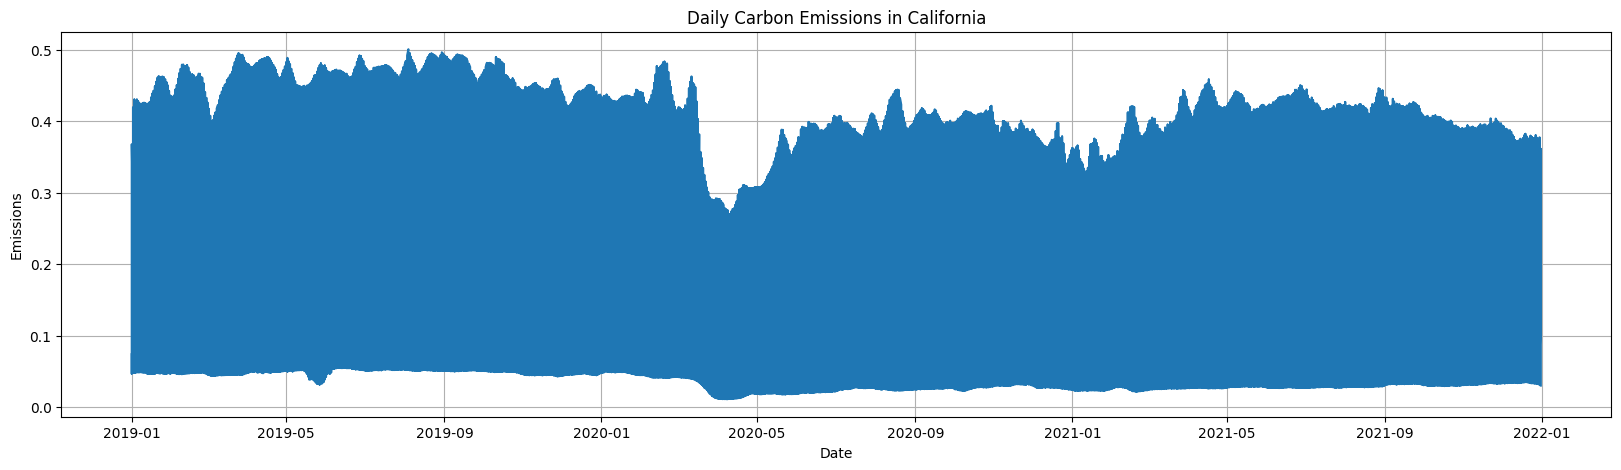

In [26]:
# 1. Trend
plt.figure(figsize=(20,5))
plt.plot(california_df['date'], california_df['emissions'])
plt.title("Daily Carbon Emissions in California")
plt.xlabel("Date")
plt.ylabel("Emissions")
plt.grid(True)
plt.show()

Gradual upward or downward movement → long-term trend

Repeating patterns → seasonal or cyclical behavior

Sharp jumps → policy changes, industrial shutdowns, extreme weather, etc.

C:\Users\innov\AppData\Local\Temp\ipykernel_18288\1149328413.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = california_df.resample('M', on='date')['emissions'].mean()


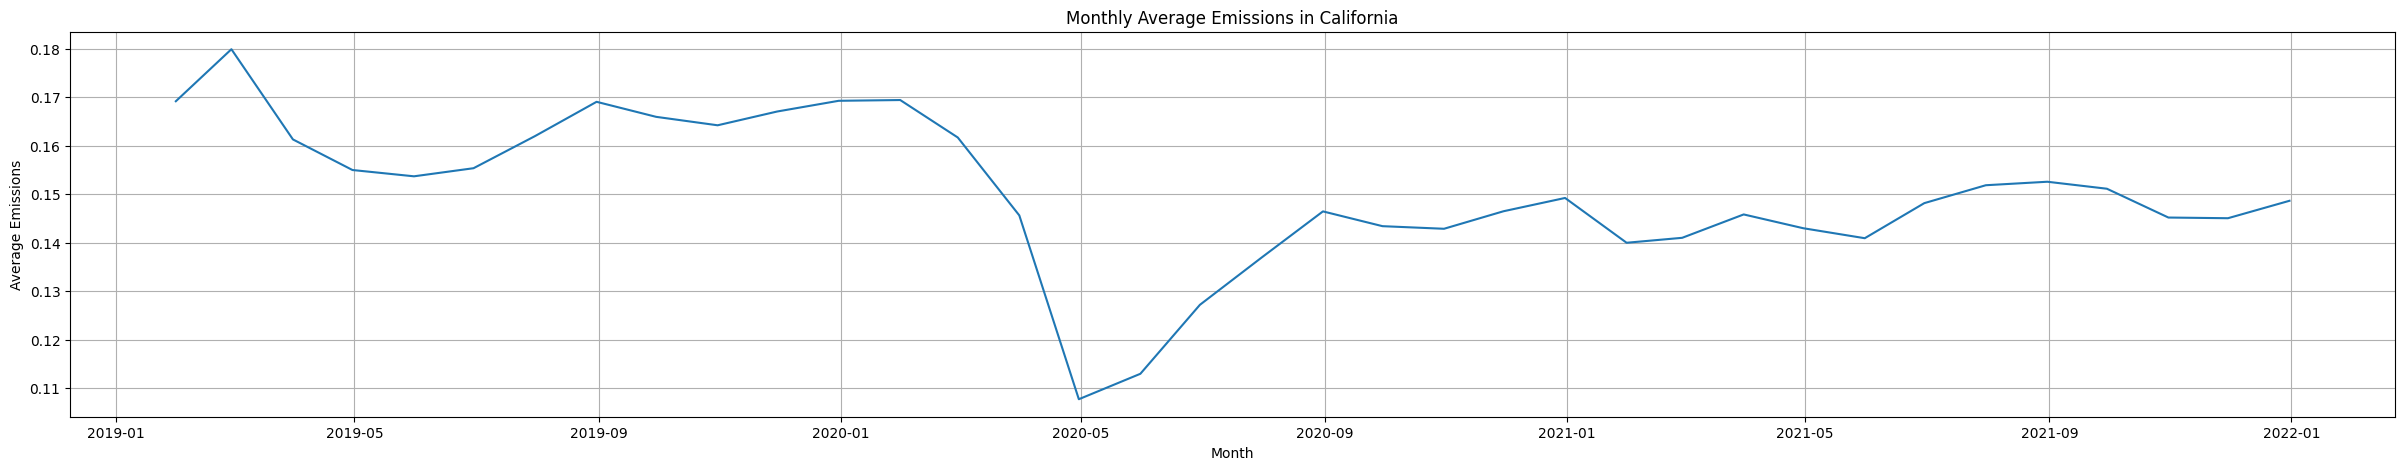

In [27]:
# 2. Seasonal Pattern
#monthly average emissions
monthly = california_df.resample('M', on='date')['emissions'].mean()

plt.figure(figsize=(30,5))
plt.plot(monthly.index, monthly.values)
plt.title("Monthly Average Emissions in California")
plt.xlabel("Month")
plt.ylabel("Average Emissions")
plt.grid(True)
plt.show()

Peaks may show summer energy use, wildfire seasons, increased travel

Dips may occur in winter months

If increasing yearly → worsening environmental conditions

C:\Users\innov\AppData\Local\Temp\ipykernel_18288\211740038.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly = california_df.resample('Y', on='date')['emissions'].mean()


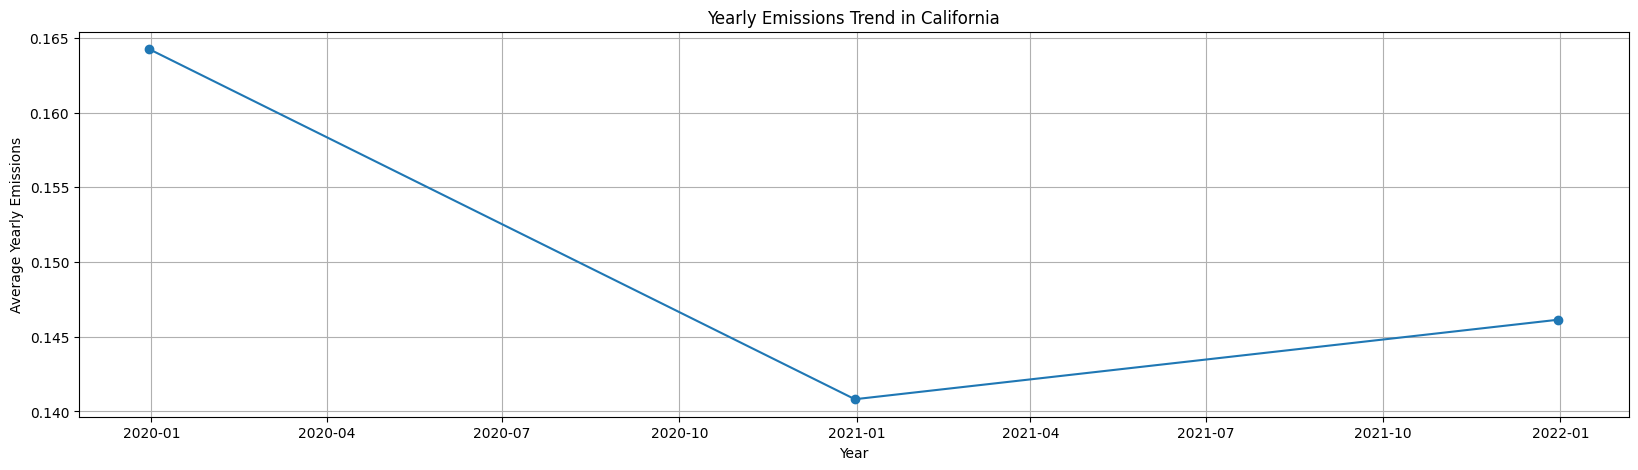

In [28]:
# 3. Yearly Trend
yearly = california_df.resample('Y', on='date')['emissions'].mean()

plt.figure(figsize=(20,5))
plt.plot(yearly.index, yearly.values, marker="o")
plt.title("Yearly Emissions Trend in California")
plt.xlabel("Year")
plt.ylabel("Average Yearly Emissions")
plt.grid(True)
plt.show()

This helps answer:

Is California improving its emissions over recent years?

Are industrial and policy measures effective?

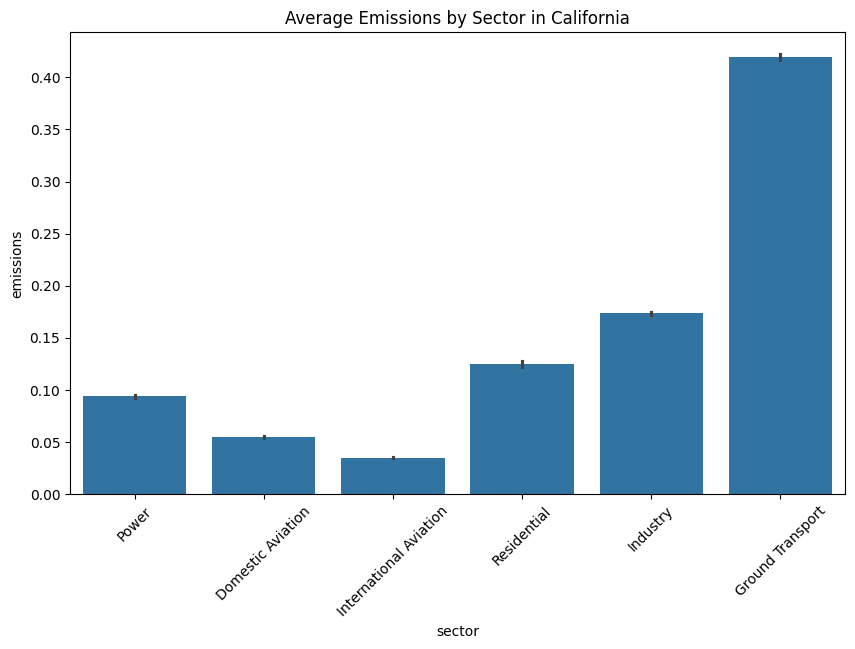

In [29]:
# 4. Mean by sector
plt.figure(figsize=(10,6))
sns.barplot(data=california_df, x='sector', y='emissions', estimator='mean')
plt.title("Average Emissions by Sector in California")
plt.xticks(rotation=45)
plt.show()

Identify the highest carbon-producing sectors

Helps in making policy recommendations

Useful for stakeholders: transportation, energy, industry ministries

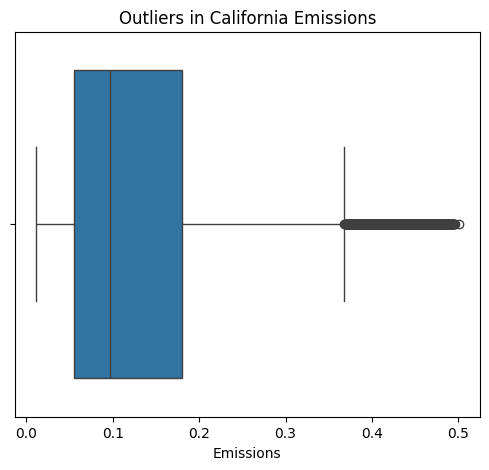

In [30]:
#Boxplot to Detect Outliers
plt.figure(figsize=(6,5))
sns.boxplot(x=california_df['emissions'])
plt.title("Outliers in California Emissions")
plt.xlabel("Emissions")
plt.show()

Points outside the whiskers → extreme emission days

Could be caused by:

Wildfires

Industrial surges

Traffic spikes (holidays)

Power-grid stress

Apply Two Analytical Techniques.
My data is numeric + temporal.


CLUSTERING (K-MEANS)
You applied K-Means clustering on monthly emissions to identify groups:

High-emission months

Medium-emission months

Low-emission months

This technique is valuable because it reveals patterns not visible in simple averages.

In [33]:
#LinearRegressionME-SERIES (TREND + FORECAST)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans







In [ ]:
#convert date column to datetime format
california_df['date'] = pd.to_datetime(california_df['date'], errors='coerce', dayfirst=True)


In [ ]:
#drop rows with NaT in date column
california_df = california_df.dropna(subset=['date'])

In [36]:
#set date as index
california_df = california_df.set_index('date')

In [ ]:
#print index
california_df.index

DatetimeIndex(['2019-01-01', '2019-01-01', '2019-01-01', '2019-01-01',
               '2019-01-01', '2019-01-01', '2019-01-02', '2019-01-02',
               '2019-01-02', '2019-01-02',
               ...
               '2021-12-30', '2021-12-30', '2021-12-30', '2021-12-30',
               '2021-12-31', '2021-12-31', '2021-12-31', '2021-12-31',
               '2021-12-31', '2021-12-31'],
              dtype='datetime64[ns]', name='date', length=6576, freq=None)

In [38]:
#resample to monthly frequency and calculate mean emissions
monthly_ca = california_df['emissions'].resample('M').mean().to_frame()

C:\Users\innov\AppData\Local\Temp\ipykernel_18288\68180427.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_ca = california_df['emissions'].resample('M').mean().to_frame()


In [39]:
monthly_ca = california_df['emissions'].resample('M').mean().to_frame()
monthly_ca.columns = ['emissions']
monthly_ca.head()

C:\Users\innov\AppData\Local\Temp\ipykernel_18288\2084394612.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_ca = california_df['emissions'].resample('M').mean().to_frame()


,emissions
date,
2019-01-31,0.169176
2019-02-28,0.179906
2019-03-31,0.161299
2019-04-30,0.154987
2019-05-31,0.153689


In [41]:
#scale the emissions data
X = monthly_ca[['emissions']]
X_scaled = StandardScaler().fit_transform(X)

In [42]:
#Apply KMeans clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
monthly_ca['cluster'] = kmeans.fit_predict(X_scaled)

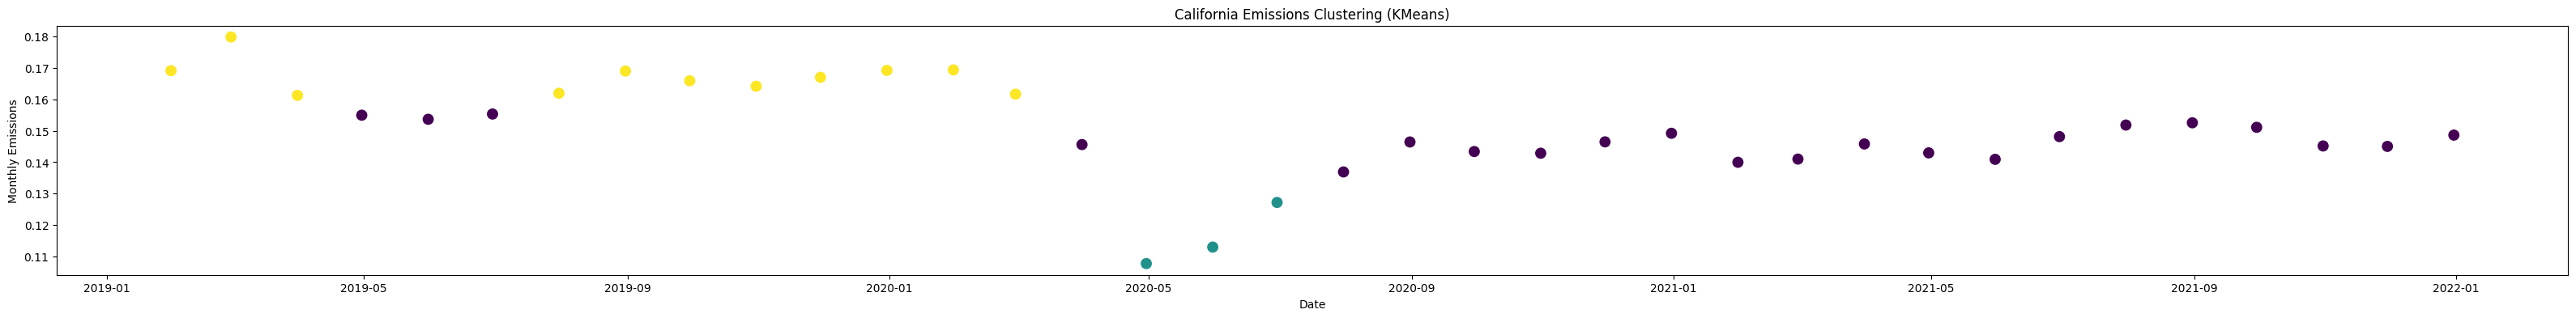

In [43]:
#Visualize Clusters
plt.figure(figsize=(40,4))
plt.scatter(monthly_ca.index, monthly_ca['emissions'], c=monthly_ca['cluster'], s=80)
plt.title("California Emissions Clustering (KMeans)")
plt.xlabel("Date")
plt.ylabel("Monthly Emissions")
plt.show()

In [ ]:
monthly_ca.to_csv("california_monthly_with_clusters.csv")

Interpretation :

Cluster 0 = Low-emission months

Cluster 1 = Medium-emission months

Cluster 2 = High-emission months

Shows seasonal or structural shifts in California’s emission behavior.

TIME-SERIES ANALYSIS (Trend + Forecast)
OLS Linear Trend Model 
The OLS (Ordinary Least Squares) trend model checks whether California’s emissions are increasing or decreasing over time by fitting a straight line of the form

In [45]:
#Create time index for trend analysis
monthly_ca['t'] = range(len(monthly_ca))


In [46]:
#Linear Regression for Trend Analysis
import statsmodels.api as sm

X = sm.add_constant(monthly_ca['t'])
y = monthly_ca['emissions']

trend_model = sm.OLS(y, X).fit()
print(trend_model.summary())


                            OLS Regression Results                            
Dep. Variable:              emissions   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     9.109
Date:                Mon, 24 Nov 2025   Prob (F-statistic):            0.00479
Time:                        10:02:29   Log-Likelihood:                 104.65
No. Observations:                  36   AIC:                            -205.3
Df Residuals:                      34   BIC:                            -202.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1619      0.004     36.460      0.0

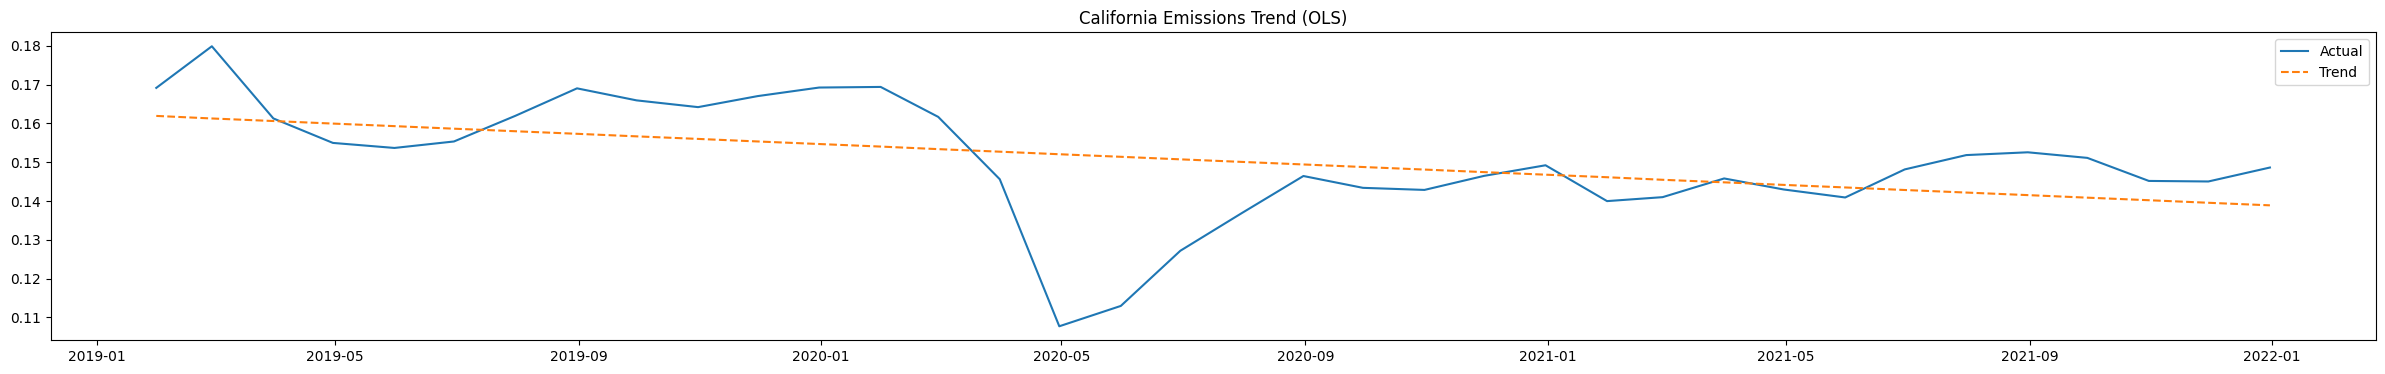

In [ ]:
#plottrendline
#Visualize Trend Line
plt.figure(figsize=(30,4))
plt.plot(monthly_ca.index, monthly_ca['emissions'], label='Actual')
plt.plot(monthly_ca.index, trend_model.predict(X), label='Trend', linestyle='--')
plt.title("California Emissions Trend (OLS)")
plt.legend()
plt.show()


In [48]:
#1 Fit ARIMA(1,1,1)
#Import ARIMA model
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(monthly_ca['emissions'], order=(1,1,1)).fit()
print(arima_model.summary())


                               SARIMAX Results                                
Dep. Variable:              emissions   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 115.727
Date:                Mon, 24 Nov 2025   AIC                           -225.453
Time:                        10:04:35   BIC                           -220.787
Sample:                    01-31-2019   HQIC                          -223.843
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2160      0.419     -0.515      0.606      -1.038       0.606
ma.L1          0.5690      0.446      1.277      0.202      -0.304       1.442
sigma2      7.813e-05    1.1e-05      7.109      0.0

 Trend (slope b₁)

If b₁ is positive, it means emissions are gradually increasing each month.

If b₁ is negative, emissions are declining over time.

If p-value < 0.05, the trend is statistically significant.



In [49]:
#Forecast next 6 months
forecast = arima_model.forecast(6)
forecast

2022-01-31    0.149389
2022-02-28    0.149227
2022-03-31    0.149262
2022-04-30    0.149254
2022-05-31    0.149256
2022-06-30    0.149256
Freq: ME, Name: predicted_mean, dtype: float64

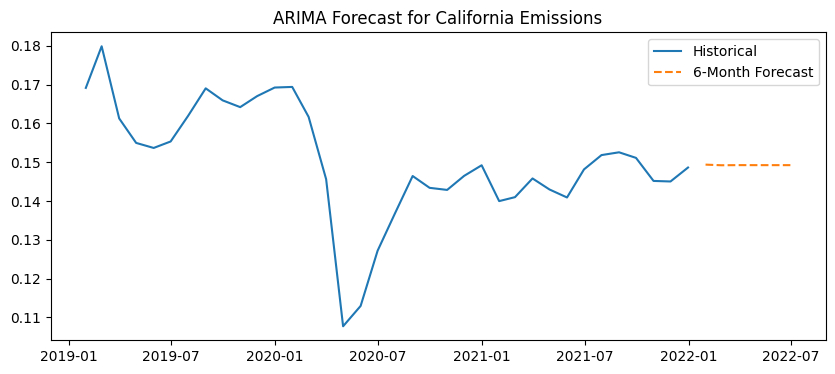

In [50]:
#Plot Forecast
plt.figure(figsize=(10,4))
plt.plot(monthly_ca['emissions'], label='Historical')
plt.plot(forecast, label='6-Month Forecast', linestyle='--')
plt.title("ARIMA Forecast for California Emissions")
plt.legend()
plt.show()